In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf

import warnings
warnings.filterwarnings("ignore")

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-laxs_n11 because the default path (/home/jjayme/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
filepath = "~/cpt5/capstone/data/processed/"

# Supply Prediction Interval

In [3]:
seed = 42
age_grps = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'indigo', 'tab:olive', 'tab:cyan',
          'darkmagenta', 'maroon', 'lime', 'darkolivegreen', 'cadetblue',
          'darkgoldenrod', 'fuchsia']

In [4]:
# Complete list of regions in order
regions = ["NCR", "CAR", "I - Ilocos", "II - Cagayan", "III - C. Luzon",
           "IVA - Calabarzon", "MIMAROPA", "V - Bicol", "VI - W. Visayas",
           "VII - C. Visayas", "VIII - E. Visayas", "IX - Zamboanga",
           "X - N. Mindanao", "XI - Davao", "XII - SOCCSKSARGEN",
           "XIII - Caraga", "BARMM", "National"]

# This is used for re-ordering
region_mapping = (pd.DataFrame({"region": regions})
                  .reset_index()
                  .set_index("region"))
display(region_mapping)

,index
region,
NCR,0
CAR,1
I - Ilocos,2
II - Cagayan,3
III - C. Luzon,4
IVA - Calabarzon,5
MIMAROPA,6
V - Bicol,7
VI - W. Visayas,8


In [5]:
# PSA population
df_pop = pd.read_csv(filepath + "Projected_age_population.csv", index_col=0)
df_pop.rename(columns={"year": "Year"}, inplace=True)

df_pop.Region.replace({
    'BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (BARMM)': 'BARMM',
    'CORDILLERA ADMINISTRATIVE REGION (CAR)': 'CAR',
    'MIMAROPA REGION': 'MIMAROPA',
    'NATIONAL CAPITAL REGION (NCR)': 'NCR',
    'REGION I (ILOCOS REGION)': 'I - Ilocos',
    'REGION II (CAGAYAN VALLEY)': 'II - Cagayan',
    'REGION III (CENTRAL LUZON)': 'III - C. Luzon',
    'REGION IV-A (CALABARZON)': 'IVA - Calabarzon',
    'REGION IX (ZAMBOANGA PENINSULA)': 'IX - Zamboanga',
    'REGION V (BICOL REGION)': 'V - Bicol',
    'REGION VI (WESTERN VISAYAS)': 'VI - W. Visayas',
    'REGION VII (CENTRAL VISAYAS)': 'VII - C. Visayas',
    'REGION VIII (EASTERN VISAYAS)': 'VIII - E. Visayas',
    'REGION X (NORTHERN MINDANAO)': 'X - N. Mindanao',
    'REGION XI (DAVAO REGION)': 'XI - Davao',
    'REGION XII (SOCCSKSARGEN)': 'XII - SOCCSKSARGEN',
    'REGION XIII (Caraga)': 'XIII - Caraga'
}, inplace=True)

df_pop.Age.replace({
    '0-4': '<25',
    '5-9': '<25',
    '10-14': '<25',
    '15-19': '<25',
    '20-24': '<25',
    '25-29': '25-34',
    '30-34': '25-34',
    '35-39': '35-44',
    '40-44': '35-44',
    '45-49': '45-54',
    '50-54': '45-54',
    '55-59': '55-64', 
    '60-64': '55-64',
    '65-69': '65+',
    '70-74': '65+',
    '75-79': '65+',
    '80 and over': '65+'
}, inplace=True)

df_pop = df_pop.groupby(["Year", "Region", "Age"]).sum().reset_index()
df_pop = df_pop.pivot(
    index=["Region", "Year"], columns="Age", values="population").reset_index()

# Re-order according to desired order of regions
df_pop["region_idx"] = df_pop.Region.map(region_mapping["index"])
df_pop.sort_values(["region_idx", "Year"], inplace=True)
df_pop.reset_index(drop=True, inplace=True)

# Re-order columns
df_pop.drop(columns="region_idx", inplace=True)
cols = list(df_pop.columns[:2])
cols.extend(age_grps)
df_pop = df_pop[cols]

display(df_pop)

Age,Region,Year,<25,25-34,35-44,45-54,55-64,65+
0,NCR,2010,5821500.0,2202000.0,1621500.0,1171200.0,671700.0,402900.0
1,NCR,2011,5876001.0,2234884.4,1653035.6,1197333.0,699843.8,423384.4
2,NCR,2012,5930502.0,2267768.8,1684571.2,1223466.0,727987.6,443868.8
3,NCR,2013,5985003.0,2300653.2,1716106.8,1249599.0,756131.4,464353.2
4,NCR,2014,6039504.0,2333537.6,1747642.4,1275732.0,784275.2,484837.6
...,...,...,...,...,...,...,...,...
352,BARMM,2026,2649832.8,810568.8,489919.2,390405.6,269196.8,148592.0
353,BARMM,2027,2692949.6,827951.6,521639.4,396404.2,280572.6,161994.0
354,BARMM,2028,2736066.4,845334.4,553359.6,402402.8,291948.4,175396.0
355,BARMM,2029,2779183.2,862717.2,585079.8,408401.4,303324.2,188798.0


In [6]:
df_all = pd.read_csv(filepath + "2010-2020_propensity_all.csv")
display(df_all)

,Region,Year,Pop_Age_<25,Pop_Age_25-34,Pop_Age_35-44,Pop_Age_45-54,Pop_Age_55-64,Pop_Age_65 and above,Age_<25,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65 and above,propensity__<25,propensity__25-34,propensity__35-44,propensity__45-54,propensity__55-64,propensity__65 and above
0,BARMM,2010,2045100.0,458200.0,377400.0,227300.0,102600.0,53500.0,0.0,0.0,16.0,15.0,20.0,9.0,0.0,0.000000,0.000042,0.000066,0.000195,0.000168
1,BARMM,2011,2102978.4,473807.8,391183.2,236437.6,105985.6,55858.2,0.0,0.0,16.0,14.0,20.0,9.0,0.0,0.000000,0.000041,0.000059,0.000189,0.000161
2,BARMM,2012,2160856.8,489415.6,404966.4,245575.2,109371.2,58216.4,0.0,0.0,17.0,13.0,20.0,8.0,0.0,0.000000,0.000042,0.000053,0.000183,0.000137
3,BARMM,2013,2218735.2,505023.4,418749.6,254712.8,112756.8,60574.6,0.0,0.0,17.0,13.0,20.0,10.0,0.0,0.000000,0.000041,0.000051,0.000177,0.000165
4,BARMM,2014,2276613.6,520631.2,432532.8,263850.4,116142.4,62932.8,0.0,6.0,18.0,13.0,20.0,10.0,0.0,0.000012,0.000042,0.000049,0.000172,0.000159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,XIII - Caraga,2016,1407026.0,382574.0,294475.0,243455.0,167009.0,132952.0,0.0,21.0,116.0,113.0,113.0,100.0,0.0,0.000055,0.000394,0.000464,0.000677,0.000752
183,XIII - Caraga,2017,1414948.0,394491.0,298810.0,244142.0,170563.0,137282.0,0.0,21.0,115.0,112.0,113.0,100.0,0.0,0.000053,0.000385,0.000459,0.000663,0.000728
184,XIII - Caraga,2018,1422138.0,406464.0,303070.0,244687.0,174093.0,141620.0,0.0,19.0,79.0,88.0,92.0,82.0,0.0,0.000047,0.000261,0.000360,0.000528,0.000579
185,XIII - Caraga,2019,1428619.0,418483.0,307255.0,245083.0,177596.0,145976.0,0.0,15.0,74.0,92.0,91.0,88.0,0.0,0.000036,0.000241,0.000375,0.000512,0.000603


## Step 1: "Forecast" 2011-2020 supply

### Prepare tables

#### No. of Physicians, 2010-2020

In [7]:
df_physicians = df_all[['Region', 'Year', 'Age_<25', 'Age_25-34', 'Age_35-44',
                        'Age_45-54', 'Age_55-64', 'Age_65 and above']]

# Re-order according to desired order of regions
df_physicians["region_idx"] = df_physicians.Region.map(region_mapping["index"])
df_physicians.sort_values(["region_idx", "Year"], inplace=True)
df_physicians = df_physicians.iloc[:, :-1].reset_index(drop=True)

# Rename columns
df_physicians.columns = df_pop.columns

display(df_physicians)

Age,Region,Year,<25,25-34,35-44,45-54,55-64,65+
0,NCR,2010,0.0,5.0,689.0,549.0,441.0,420.0
1,NCR,2011,0.0,22.0,881.0,723.0,557.0,494.0
2,NCR,2012,0.0,374.0,2577.0,1936.0,1409.0,1587.0
3,NCR,2013,0.0,536.0,2924.0,2179.0,1598.0,1853.0
4,NCR,2014,4.0,553.0,2940.0,2187.0,1607.0,1882.0
...,...,...,...,...,...,...,...,...
182,BARMM,2016,0.0,39.0,87.0,57.0,56.0,10.0
183,BARMM,2017,0.0,40.0,88.0,60.0,54.0,10.0
184,BARMM,2018,0.0,32.0,64.0,47.0,48.0,10.0
185,BARMM,2019,0.0,28.0,65.0,43.0,52.0,13.0


#### Change in Population, 2010-2020

In [8]:
# Population
df_pop_past = df_pop[df_pop.Year <= 2020].reset_index(drop=True)

display(df_pop_past)

Age,Region,Year,<25,25-34,35-44,45-54,55-64,65+
0,NCR,2010,5821500.0,2202000.0,1621500.0,1171200.0,671700.0,402900.0
1,NCR,2011,5876001.0,2234884.4,1653035.6,1197333.0,699843.8,423384.4
2,NCR,2012,5930502.0,2267768.8,1684571.2,1223466.0,727987.6,443868.8
3,NCR,2013,5985003.0,2300653.2,1716106.8,1249599.0,756131.4,464353.2
4,NCR,2014,6039504.0,2333537.6,1747642.4,1275732.0,784275.2,484837.6
...,...,...,...,...,...,...,...,...
182,BARMM,2016,2361351.0,558494.0,448025.0,282771.0,131270.0,71231.0
183,BARMM,2017,2388311.0,581424.0,449637.0,292818.0,143420.0,77381.0
184,BARMM,2018,2415411.0,605103.0,451157.0,303157.0,156011.0,83748.0
185,BARMM,2019,2442627.0,629550.0,452562.0,313804.0,169066.0,90348.0


In [9]:
# Change in population
df_pop_delta = pd.DataFrame()

for region in regions[:-1]:
    # Population of region
    df_pop_region = df_pop_past[df_pop_past.Region == region]
    
    # Get change in population per age group
    df_pop_delta_region = df_pop_region.iloc[:, :2]
    for age_grp in age_grps:
        df_pop_delta_region[age_grp] = df_pop_region[age_grp].diff(1)
        
    # Append to main dataframe
    if df_pop_delta.empty:
        df_pop_delta = df_pop_delta_region.iloc[1:, :]
    else:
        df_pop_delta = pd.concat([df_pop_delta, df_pop_delta_region])
        
df_pop_delta.reset_index(drop=True, inplace=True)

display(df_pop_delta)

Age,Region,Year,<25,25-34,35-44,45-54,55-64,65+
0,NCR,2011,54501.0,32884.4,31535.6,26133.0,28143.8,20484.4
1,NCR,2012,54501.0,32884.4,31535.6,26133.0,28143.8,20484.4
2,NCR,2013,54501.0,32884.4,31535.6,26133.0,28143.8,20484.4
3,NCR,2014,54501.0,32884.4,31535.6,26133.0,28143.8,20484.4
4,NCR,2015,54501.0,32884.4,31535.6,26133.0,28143.8,20484.4
...,...,...,...,...,...,...,...,...
181,BARMM,2016,26859.0,22255.0,1709.0,9783.0,11742.0,5940.0
182,BARMM,2017,26960.0,22930.0,1612.0,10047.0,12150.0,6150.0
183,BARMM,2018,27100.0,23679.0,1520.0,10339.0,12591.0,6367.0
184,BARMM,2019,27216.0,24447.0,1405.0,10647.0,13055.0,6600.0


#### Cumulative Average Propensity, 2010-2020

In [10]:
# Propensity
df_L = df_all[['Region', 'Year', 'propensity__<25', 'propensity__25-34',
               'propensity__35-44', 'propensity__45-54', 'propensity__55-64',
               'propensity__65 and above']]

# Rename columns
df_L.columns = list(df_pop.columns)

display(df_L)

,Region,Year,<25,25-34,35-44,45-54,55-64,65+
0,BARMM,2010,0.0,0.000000,0.000042,0.000066,0.000195,0.000168
1,BARMM,2011,0.0,0.000000,0.000041,0.000059,0.000189,0.000161
2,BARMM,2012,0.0,0.000000,0.000042,0.000053,0.000183,0.000137
3,BARMM,2013,0.0,0.000000,0.000041,0.000051,0.000177,0.000165
4,BARMM,2014,0.0,0.000012,0.000042,0.000049,0.000172,0.000159
...,...,...,...,...,...,...,...,...
182,XIII - Caraga,2016,0.0,0.000055,0.000394,0.000464,0.000677,0.000752
183,XIII - Caraga,2017,0.0,0.000053,0.000385,0.000459,0.000663,0.000728
184,XIII - Caraga,2018,0.0,0.000047,0.000261,0.000360,0.000528,0.000579
185,XIII - Caraga,2019,0.0,0.000036,0.000241,0.000375,0.000512,0.000603


In [11]:
# Average propensity
df_LA = pd.DataFrame()

for region in regions[:-1]:
    # Propensity per region
    df_L_region = df_L[df_L.Region == region]
    
    # Get cumulative average propensity per age group
    # Examples: 2010 figure = 2010 propensity
    #           2011 figure = 2010-2011 average propensity
    #           ...
    #           2020 figure = 2010-2020 average propensity
    df_LA_region = df_L_region.iloc[:, :2]
    for age_grp in age_grps:
        df_LA_region[age_grp] = df_L_region[age_grp].expanding().mean()
        
    # Append to main dataframe
    if df_LA.empty:
        df_LA = df_LA_region.copy()
    else:
        df_LA = pd.concat([df_LA, df_LA_region])
        
df_LA.reset_index(drop=True, inplace=True)

display(df_LA)

,Region,Year,<25,25-34,35-44,45-54,55-64,65+
0,NCR,2010,0.000000e+00,0.000002,0.000425,0.000469,0.000657,0.001042
1,NCR,2011,0.000000e+00,0.000006,0.000479,0.000536,0.000726,0.001105
2,NCR,2012,0.000000e+00,0.000059,0.000829,0.000885,0.001129,0.001928
3,NCR,2013,0.000000e+00,0.000103,0.001048,0.001100,0.001375,0.002444
4,NCR,2014,1.324612e-07,0.000129,0.001175,0.001223,0.001510,0.002731
...,...,...,...,...,...,...,...,...
182,BARMM,2016,0.000000e+00,0.000022,0.000085,0.000098,0.000259,0.000155
183,BARMM,2017,0.000000e+00,0.000028,0.000099,0.000112,0.000273,0.000152
184,BARMM,2018,0.000000e+00,0.000031,0.000104,0.000117,0.000277,0.000148
185,BARMM,2019,0.000000e+00,0.000032,0.000108,0.000119,0.000280,0.000148


### "Forecast" 2011-2020 supply

\begin{equation}
    \text{Forecasted Supply}_N = \text{Actual Supply}_{N-1} + \sum_A \bar{L}_A \times \Delta \text{Pop}_{A, N-1, N}
\end{equation}

where:<br>
$\bar{L}_A =$ average propensity of age group $A$ from years 2010 to $N-1$<br>
$\Delta \text{Pop}_{A, N-1, N} = \text{Pop}_{A, N} - \text{Pop}_{A, N-1}$, where $\text{Pop}_{A, N}$ is the population of age group $A$ for year $N$

In [12]:
df_f_past = pd.DataFrame(columns=regions[:-1])
for year in range(2011, 2021):
    # Supply in year N-1
    prev_supply = (df_physicians[df_physicians.Year == year-1].iloc[:, 2:]
                   .sum(axis=1)
                   .reset_index(drop=True)
                  )
    
    # Change in population from year N-1 to N
    pop_delta = (df_pop_delta[df_pop_delta.Year == year].iloc[:, 2:]
                 .reset_index(drop=True)
                )
    
    # Cumulative average propensity from years 2010 to N-1
    LA = (df_LA[df_LA.Year == year-1].iloc[:, 2:]
          .reset_index(drop=True)
         )
    
    # Addition to supply in year N
    addl_supply = (pop_delta * LA).sum(axis=1)
    
    # Supply in year N
    curr_supply = prev_supply + addl_supply
    
    # Add to main dataframe
    df_f_past.loc[year] = curr_supply.to_numpy()
    
display(df_f_past)

,NCR,CAR,I - Ilocos,II - Cagayan,III - C. Luzon,IVA - Calabarzon,MIMAROPA,V - Bicol,VI - W. Visayas,VII - C. Visayas,VIII - E. Visayas,IX - Zamboanga,X - N. Mindanao,XI - Davao,XII - SOCCSKSARGEN,XIII - Caraga,BARMM
2011,2169.555892,714.236761,1288.081645,745.813239,2269.585994,2183.281492,349.501628,629.597251,623.905983,1037.263184,704.916212,424.518484,852.181675,232.427964,753.299467,400.014878,62.244020
2012,2749.383683,720.052270,1319.040773,761.604976,2289.165352,2264.106843,349.327463,721.389067,947.109176,1076.360125,709.722502,439.623973,873.005510,691.447609,748.663356,401.819881,61.183835
2013,8005.498807,744.043241,1311.698594,775.384401,2346.150393,2270.685321,351.182931,724.494031,1015.347523,1078.135659,713.532494,516.117050,916.082266,655.083854,763.210259,398.657047,60.124384
2014,9243.920322,741.919991,1342.531105,801.275213,2419.626555,2391.365886,350.025029,751.593335,1031.929028,1155.329785,763.631093,516.274930,938.101302,668.858691,764.749167,400.513959,62.097223
2015,9344.708711,741.765880,1618.767214,808.100124,2423.793540,2396.498367,364.928844,753.573169,1087.357570,1168.373374,771.632949,519.313100,952.019757,669.201436,766.303342,403.387722,69.110059
2016,11419.401980,1012.007196,1857.803664,1092.114846,3872.780073,3994.478636,423.054239,1225.625756,1941.686094,1991.714982,1001.026819,890.085768,1193.121405,1447.373899,927.703461,468.742021,253.865696
2017,12388.159177,1020.376033,1865.128825,1090.443237,3904.779134,4022.316537,423.034203,1286.199273,2120.628722,1959.217314,1000.720906,897.766743,1202.447491,1451.590110,958.722269,470.718424,254.727123
2018,13717.690614,1025.565973,1863.165715,1087.525535,3956.038643,4066.256446,423.962873,1299.541214,2122.873994,2150.595637,1001.243620,895.194028,1278.741255,1454.011971,975.620493,468.667061,258.374264
2019,9909.139671,593.660551,1133.498549,638.352079,2473.243510,2481.762949,286.533283,758.899964,1579.738529,1677.949937,688.924785,561.780030,833.303949,962.149267,578.887768,367.410822,207.732758
2020,9906.413016,587.884909,1132.161361,637.408430,2470.203406,2478.234828,286.189422,758.329103,1579.586804,1677.323042,688.723416,561.408508,832.120836,962.375978,577.499653,367.183913,208.065535


#### CHECK: Compare Actual vs Forecast

In [13]:
# Actual no. of physicians
df_actual = df_physicians.copy()
df_actual["Total"] = df_actual.iloc[:, 2:].sum(axis=1)
df_actual = (df_actual.pivot(index="Year", columns="Region", values="Total")
             [regions[:-1]]
            )

display(df_actual)

Region,NCR,CAR,I - Ilocos,II - Cagayan,III - C. Luzon,IVA - Calabarzon,MIMAROPA,V - Bicol,VI - W. Visayas,VII - C. Visayas,VIII - E. Visayas,IX - Zamboanga,X - N. Mindanao,XI - Davao,XII - SOCCSKSARGEN,XIII - Caraga,BARMM
Year,,,,,,,,,,,,,,,,,
2010,2104.0,698.0,1255.0,725.0,2189.0,2092.0,339.0,613.0,610.0,1013.0,687.0,414.0,828.0,225.0,725.0,390.0,60.0
2011,2677.0,704.0,1286.0,741.0,2210.0,2173.0,339.0,704.0,930.0,1052.0,692.0,429.0,849.0,677.0,721.0,392.0,59.0
2012,7883.0,728.0,1279.0,755.0,2268.0,2181.0,341.0,707.0,997.0,1054.0,696.0,505.0,892.0,639.0,736.0,389.0,58.0
2013,9090.0,726.0,1310.0,781.0,2342.0,2302.0,340.0,734.0,1013.0,1131.0,746.0,505.0,914.0,652.0,738.0,391.0,60.0
2014,9173.0,726.0,1585.0,788.0,2347.0,2308.0,355.0,736.0,1068.0,1144.0,754.0,508.0,928.0,652.0,740.0,394.0,67.0
2015,11071.0,994.0,1826.0,1068.0,3764.0,3869.0,414.0,1212.0,1921.0,1952.0,986.0,877.0,1157.0,1419.0,895.0,461.0,249.0
2016,12013.0,1002.0,1833.0,1066.0,3791.0,3891.0,414.0,1272.0,2098.0,1918.0,985.0,884.0,1166.0,1420.0,926.0,463.0,249.0
2017,13320.0,1007.0,1831.0,1063.0,3839.0,3931.0,415.0,1285.0,2099.0,2108.0,985.0,881.0,1242.0,1420.0,943.0,461.0,252.0
2018,9515.0,576.0,1103.0,615.0,2360.0,2351.0,278.0,745.0,1556.0,1636.0,673.0,548.0,798.0,928.0,548.0,360.0,201.0


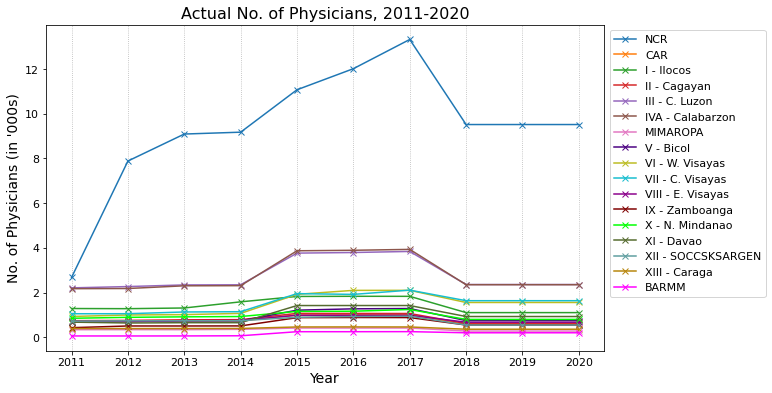

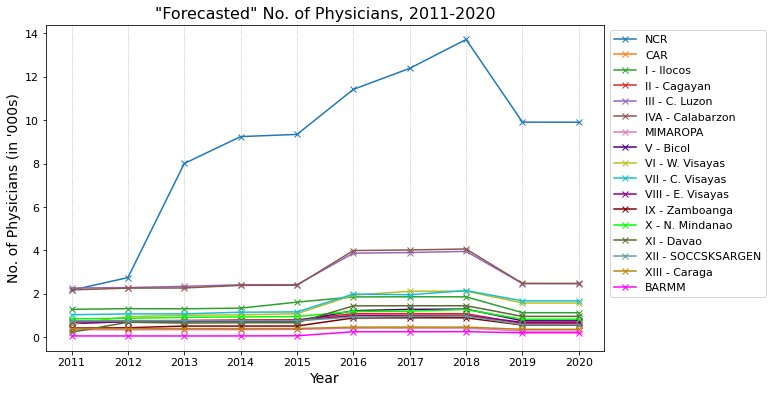

In [14]:
# Plot for actual no. of physicians
(df_actual/1000).iloc[1:, :].plot(figsize=(10, 6), marker="x", color=colors)
plt.xticks(np.arange(2011, 2021, 1), fontsize=11)
plt.yticks(fontsize=11)
plt.title("Actual No. of Physicians, 2011-2020", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("No. of Physicians (in '000s)", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), fontsize=11)
plt.grid(visible=True, axis="x", linestyle=":")
plt.autoscale()
plt.show()

# Plot forr "forecasted" no. of physicians
(df_f_past/1000).plot(figsize=(10, 6), marker="x", color=colors)
plt.xticks(np.arange(2011, 2021, 1), fontsize=11)
plt.yticks(fontsize=11)
plt.title("\"Forecasted\" No. of Physicians, 2011-2020", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("No. of Physicians (in '000s)", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), fontsize=11)
plt.grid(visible=True, axis="x", linestyle=":")
plt.autoscale()
plt.show()

## Step 2: Calculate residuals

In [15]:
df_resid = df_actual.iloc[1:, :] - df_f_past
display(df_resid)

Region,NCR,CAR,I - Ilocos,II - Cagayan,III - C. Luzon,IVA - Calabarzon,MIMAROPA,V - Bicol,VI - W. Visayas,VII - C. Visayas,VIII - E. Visayas,IX - Zamboanga,X - N. Mindanao,XI - Davao,XII - SOCCSKSARGEN,XIII - Caraga,BARMM
Year,,,,,,,,,,,,,,,,,
2011,507.444108,-10.236761,-2.081645,-4.813239,-59.585994,-10.281492,-10.501628,74.402749,306.094017,14.736816,-12.916212,4.481516,-3.181675,444.572036,-32.299467,-8.014878,-3.244020
2012,5133.616317,7.947730,-40.040773,-6.604976,-21.165352,-83.106843,-8.327463,-14.389067,49.890824,-22.360125,-13.722502,65.376027,18.994490,-52.447609,-12.663356,-12.819881,-3.183835
2013,1084.501193,-18.043241,-1.698594,5.615599,-4.150393,31.314679,-11.182931,9.505969,-2.347523,52.864341,32.467506,-11.117050,-2.082266,-3.083854,-25.210259,-7.657047,-0.124384
2014,-70.920322,-15.919991,242.468895,-13.275213,-72.626555,-83.365886,4.974971,-15.593335,36.070972,-11.329785,-9.631093,-8.274930,-10.101302,-16.858691,-24.749167,-6.513959,4.902777
2015,1726.291289,252.234120,207.232786,259.899876,1340.206460,1472.501633,49.071156,458.426831,833.642430,783.626626,214.367051,357.686900,204.980243,749.798564,128.696658,57.612278,179.889941
2016,593.598020,-10.007196,-24.803664,-26.114846,-81.780073,-103.478636,-9.054239,46.374244,156.313906,-73.714982,-16.026819,-6.085768,-27.121405,-27.373899,-1.703461,-5.742021,-4.865696
2017,931.840823,-13.376033,-34.128825,-27.443237,-65.779134,-91.316537,-8.034203,-1.199273,-21.628722,148.782686,-15.720906,-16.766743,39.552509,-31.590110,-15.722269,-9.718424,-2.727123
2018,-4202.690614,-449.565973,-760.165715,-472.525535,-1596.038643,-1715.256446,-145.962873,-554.541214,-566.873994,-514.595637,-328.243620,-347.194028,-480.741255,-526.011971,-427.620493,-108.667061,-57.374264
2019,-394.139671,-22.660551,-30.498549,-23.352079,-113.243510,-130.762949,-8.533283,-13.899964,-23.738529,-41.949937,-15.924785,-13.780030,-35.303949,-34.149267,-30.887768,-7.410822,-6.732758


### CHECK: Do the residuals have autocorrelation?
Short answer: No!<br>
If there was autocorrelation, this would affect how residuals are bootstrapped in the next section.

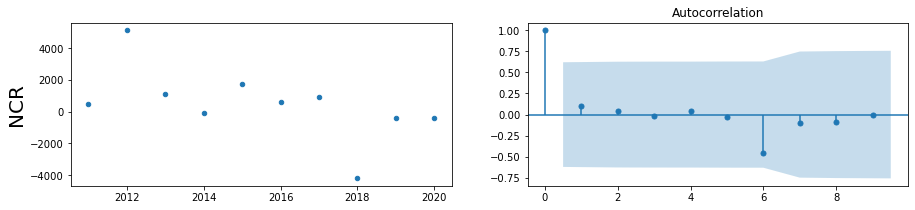

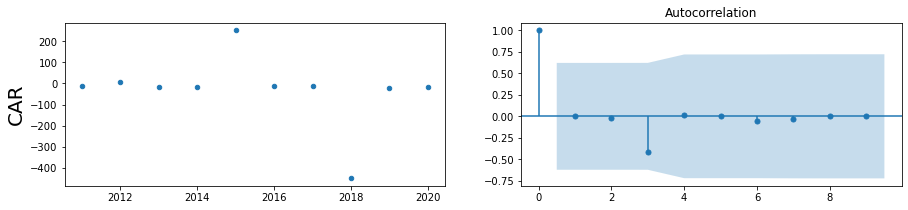

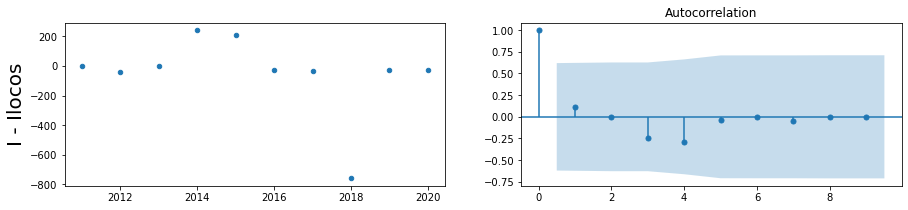

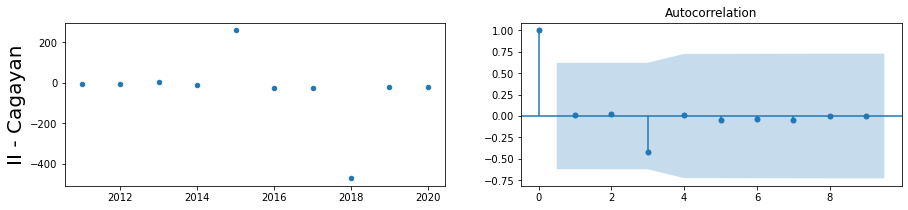

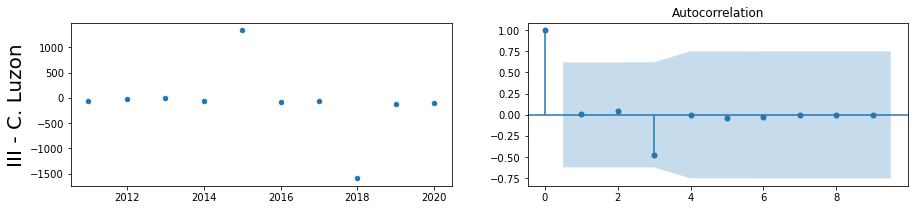

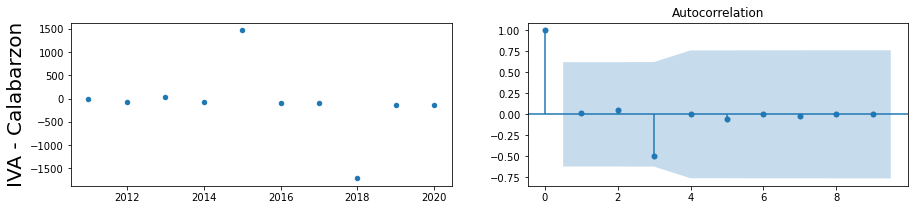

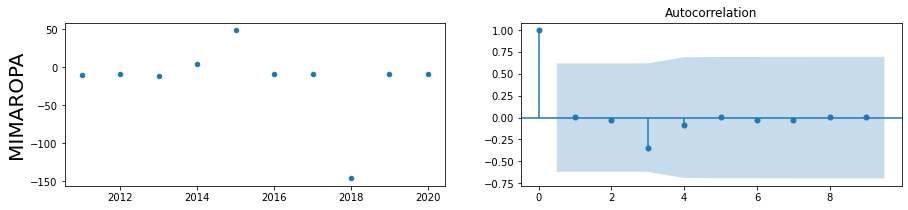

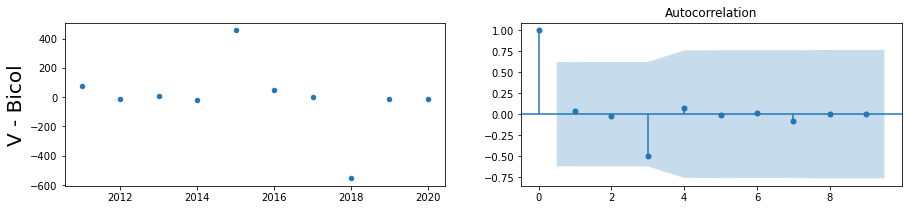

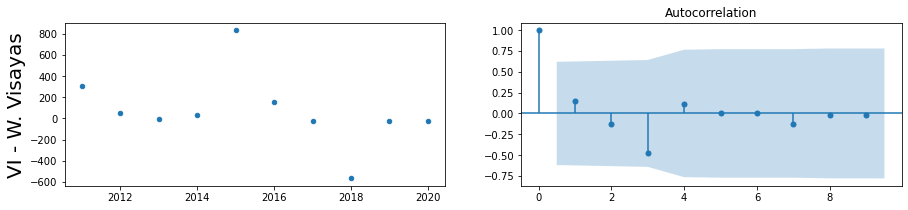

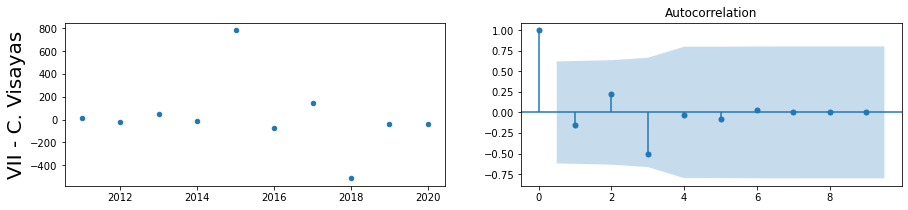

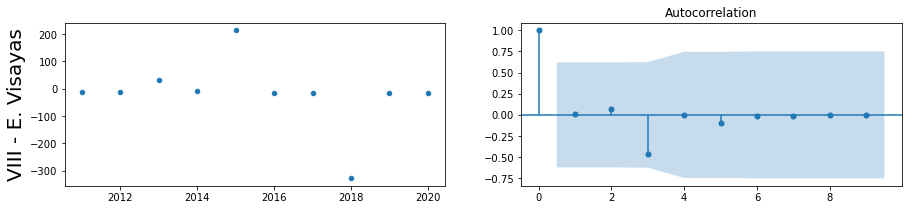

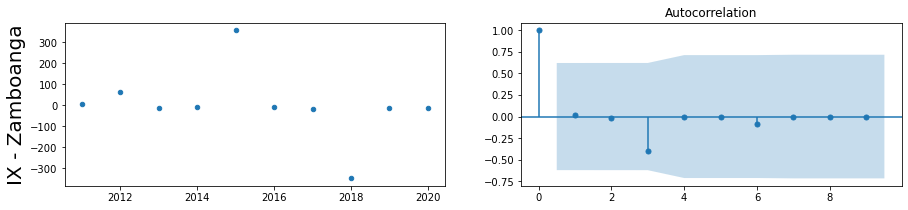

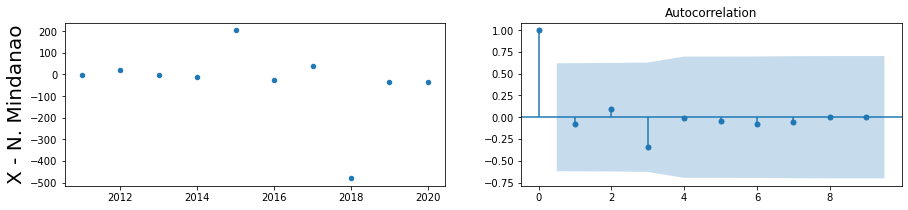

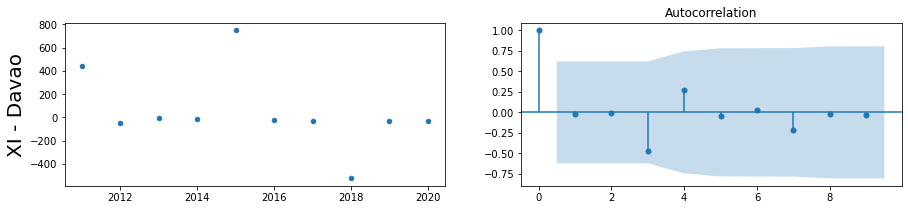

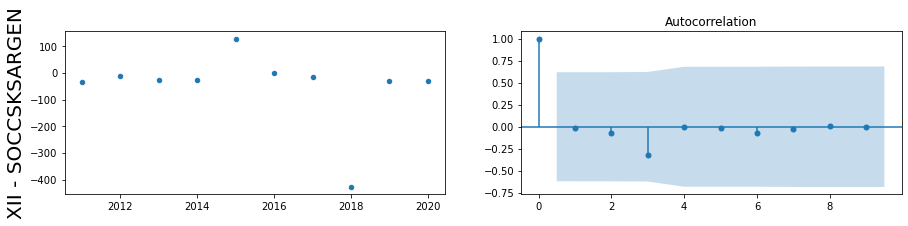

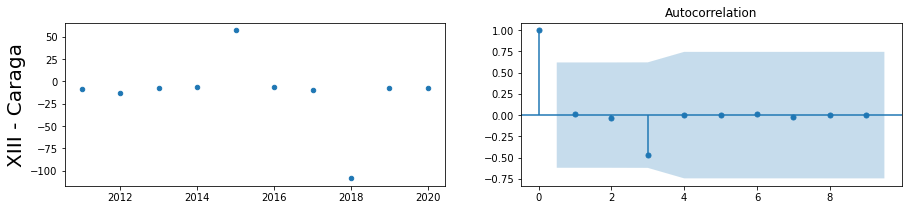

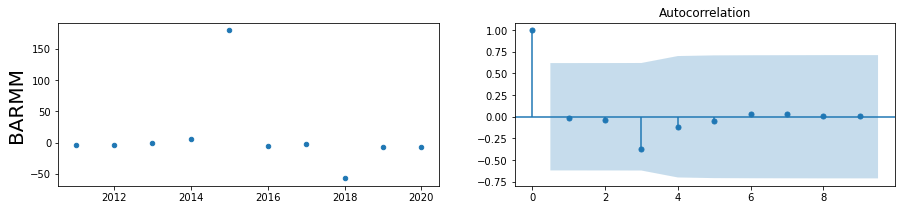

In [16]:
for region in regions[:-1]:
    df_resid_region = df_resid[region].reset_index()
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    
    # Plot residuals
    df_resid_region.plot.scatter(x="Year", y=region, ax=ax[0])
    ax[0].set_xlabel(None)
    ax[0].set_ylabel(region, fontsize=20)
    plt.autoscale()
    
    # Plot autocorrelation of residuals
    plot_acf(df_resid_region[region], ax=ax[1])
    plt.autoscale()
    plt.show()

## Step 3: Bootstrap residuals to produce new time series

In [17]:
np.random.seed(seed)

# No. of simulations
sim_size = 10_000

df_boot_past = pd.DataFrame()

for region in regions[:-1]:
    for i in range(sim_size):
        res_region = df_resid[region].to_numpy()
        
        # Bootstrap residuals (with replacement)
        res_region = np.random.choice(res_region, size=len(res_region))
        
        # Produce new 2011-2020 time series from bootstrapped residuals
        if i == 0:
            boot_past_region = df_f_past[region].to_numpy() + res_region
        else:
            boot_past_region = np.append(
                boot_past_region,
                df_f_past[region].to_numpy() + res_region,
                axis=0)
            
    # Create dataframe for region
    boot_past_region = boot_past_region.reshape((sim_size, -1)).T
    df_boot_past_region = pd.DataFrame(boot_past_region)
    df_boot_past_region["Year"] = range(2011, 2021)
    df_boot_past_region["Region"] = region
    cols = list(df_boot_past_region.columns[-2:])
    cols.extend(list(df_boot_past_region.columns[:-2]))
    df_boot_past_region = df_boot_past_region[cols]
    
    # Append to main dataframe
    if df_boot_past.empty:
        df_boot_past = df_boot_past_region.copy()
    else:
        df_boot_past = pd.concat([df_boot_past, df_boot_past_region])
        
display(df_boot_past)

,Year,Region,0,1,2,3,4,5,6,7,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,2011,NCR,3101.396715,2098.635570,3895.847180,1775.416221,1775.416221,3254.057084,2098.635570,-2033.134722,...,7303.172208,2763.153912,1775.416221,-2033.134722,1775.416221,1778.142876,2763.153912,1778.142876,-2033.134722,-2033.134722
1,2012,NCR,2678.463361,-1453.306931,3256.827792,3833.884876,7883.000000,3256.827792,3342.981703,4475.674972,...,3681.224507,3833.884876,3681.224507,2355.244013,7883.000000,2678.463361,7883.000000,-1453.306931,7883.000000,-1453.306931
2,2013,NCR,3802.808193,3802.808193,7614.085792,9731.790096,7614.085792,7934.578485,13139.115124,13139.115124,...,3802.808193,8937.339631,7934.578485,7934.578485,7614.085792,8937.339631,7934.578485,8512.942916,8599.096827,8937.339631
3,2014,NCR,10970.211611,10328.421515,9837.518342,10328.421515,8849.780651,14377.536639,8852.507306,10970.211611,...,9173.000000,8849.780651,14377.536639,14377.536639,9751.364430,5041.229708,10328.421515,5041.229708,9173.000000,14377.536639
4,2015,NCR,10276.549535,9938.306731,8950.569041,10276.549535,8953.295696,5142.018097,14478.325028,5142.018097,...,10276.549535,9938.306731,10429.209904,10276.549535,8953.295696,5142.018097,9852.152820,14478.325028,8953.295696,11071.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2016,BARMM,247.132939,433.755638,196.491432,250.681861,247.132939,250.681861,250.621676,250.681861,...,249.000000,250.681861,433.755638,247.132939,250.681861,246.800161,433.755638,247.132939,250.681861,433.755638
6,2017,BARMM,247.661588,197.352859,251.483103,252.000000,259.629900,247.661588,259.629900,259.629900,...,251.483103,249.861427,251.543288,247.994365,251.543288,247.661588,259.629900,249.861427,434.617064,247.661588
7,2018,BARMM,438.264206,263.277042,201.000000,201.000000,251.308729,251.308729,438.264206,263.277042,...,255.130244,258.249881,438.264206,255.647141,438.264206,438.264206,438.264206,258.249881,263.277042,258.249881
8,2019,BARMM,200.667223,202.867061,204.548923,202.867061,200.667223,200.667223,150.358493,212.635535,...,212.635535,150.358493,200.667223,204.488737,200.667223,150.358493,387.622699,205.005635,207.608374,207.608374


### CHECK: Plot new time series against original

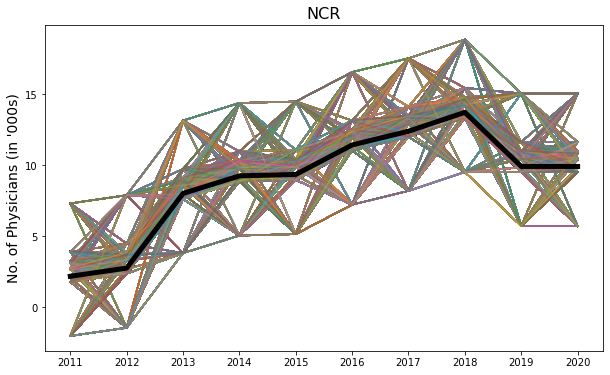

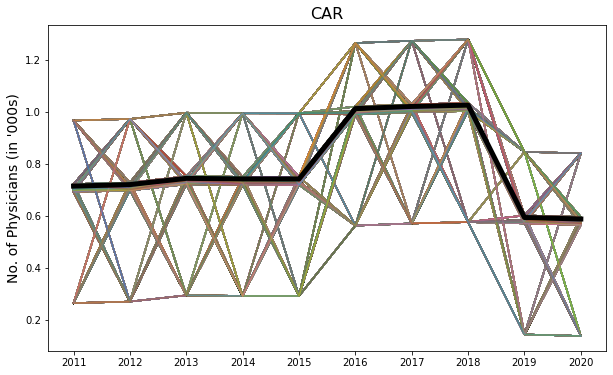

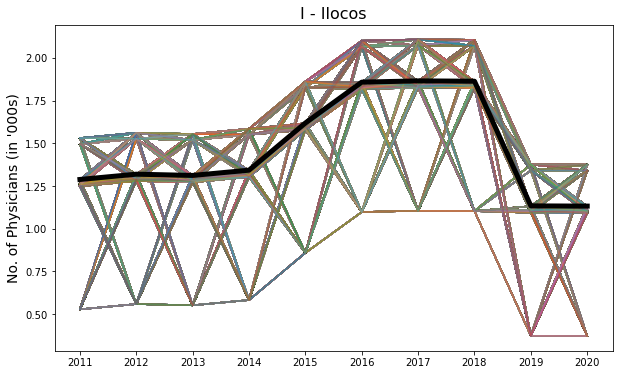

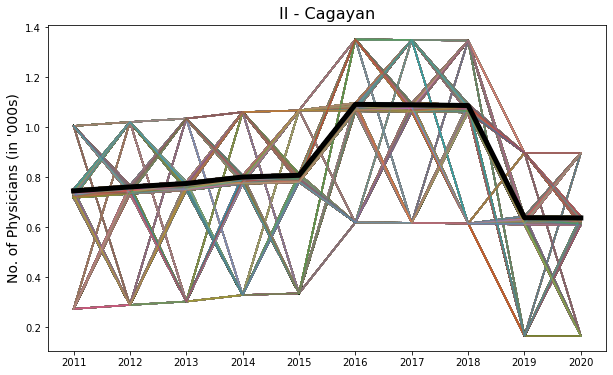

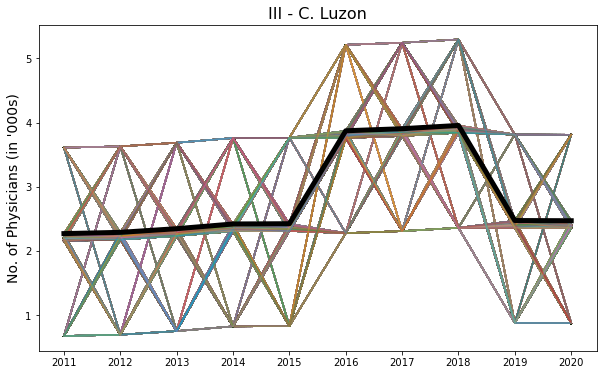

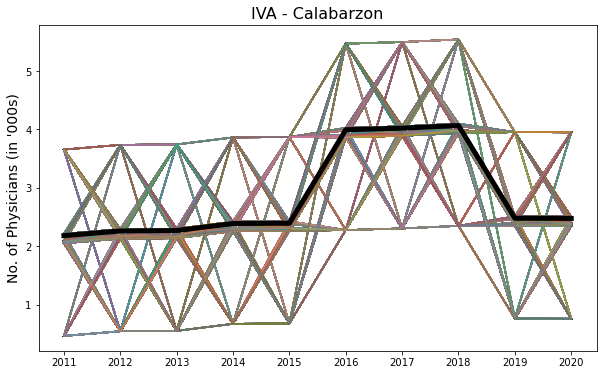

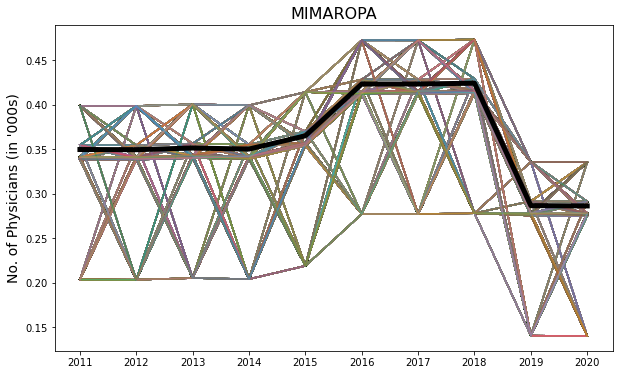

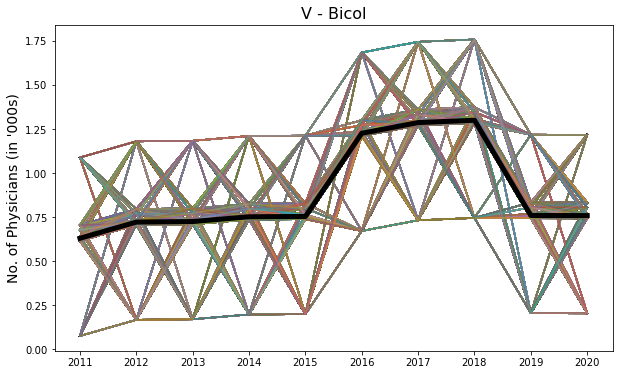

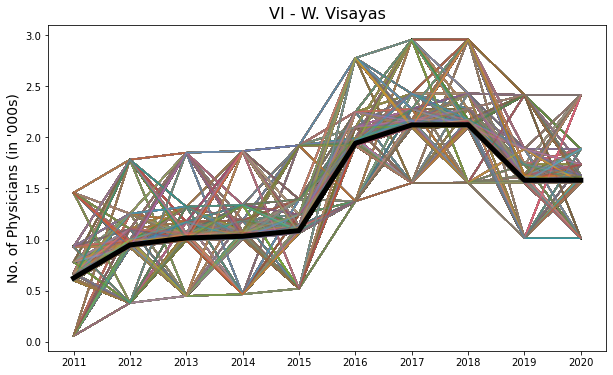

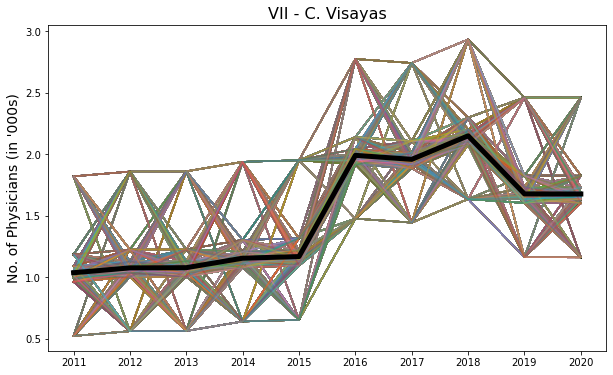

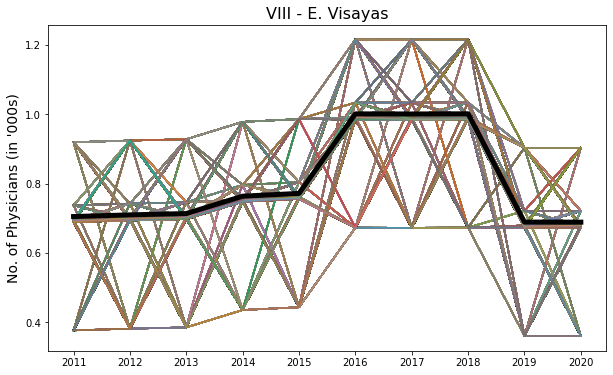

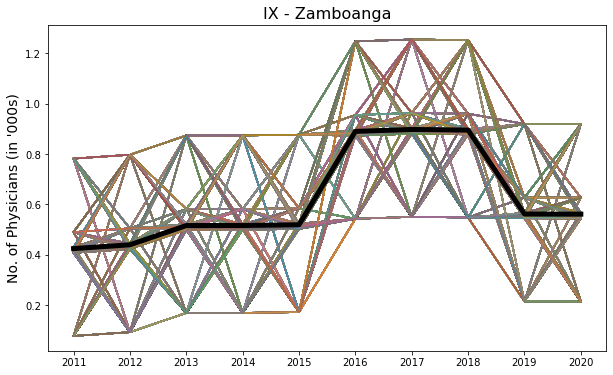

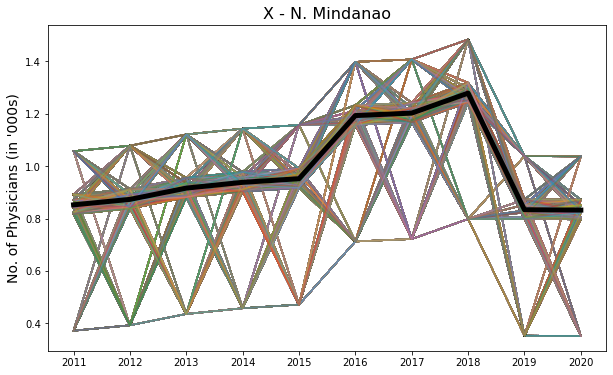

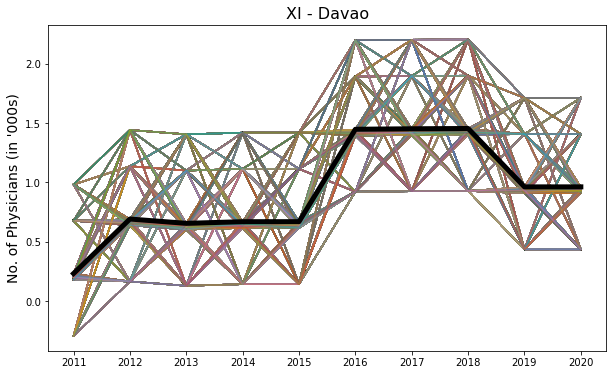

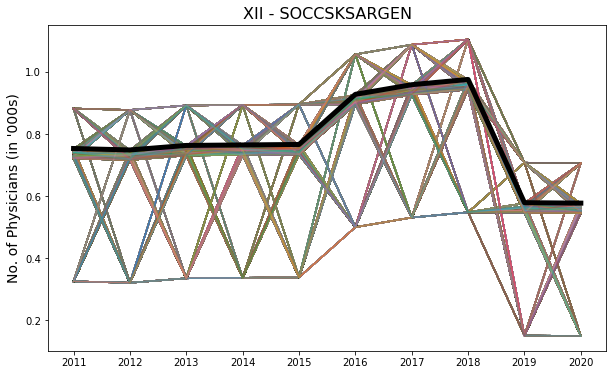

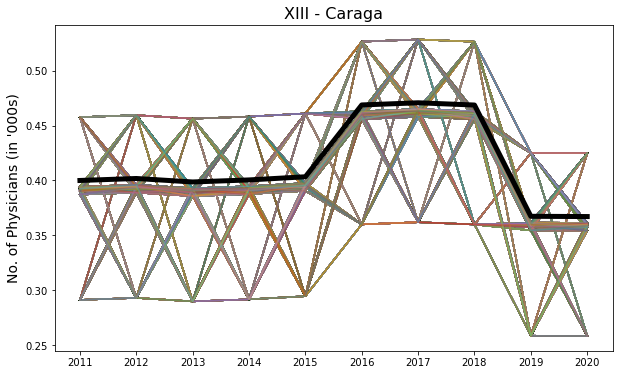

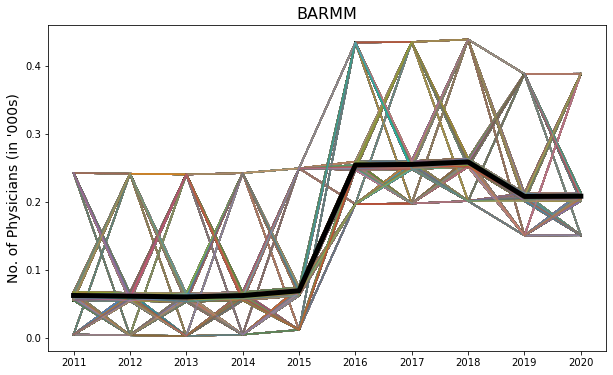

In [18]:
for region in regions[:-1]:
    df_boot_past_region = (df_boot_past[df_boot_past.Region == region]
                           .drop(columns="Region")
                           .set_index("Year")
                          )
    (df_boot_past_region/1000).plot(figsize=(10, 6), alpha=.3, legend=False)
    (df_f_past[region]/1000).plot(color="k", linewidth=5)
    plt.xticks(np.arange(2011, 2021, 1))
    plt.title(region, fontsize=16)
    plt.xlabel(None)
    plt.ylabel("No. of Physicians (in '000s)", fontsize=14)
    plt.autoscale()
    plt.show()

## Step 4: Forecast 2021-2030 supply

### Prepare tables

#### No. of Physicians, 2020

In [19]:
# Bootstrapped 2020 supply
df_boot_2020 = df_boot_past[df_boot_past.Year == 2020].reset_index(drop=True)
display(df_boot_2020)

,Year,Region,0,1,2,3,4,5,6,7,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,2020,NCR,11632.704304,15040.029332,9835.492694,9835.492694,5703.722402,9515.000000,9512.273345,9512.273345,...,9515.000000,10413.857124,11632.704304,9835.492694,10413.857124,10838.253839,9835.492694,9512.273345,10990.914208,10413.857124
1,2020,CAR,138.318937,565.224358,595.832639,571.964919,840.119030,571.000000,565.224358,138.318937,...,138.318937,577.648148,595.832639,569.841668,565.224358,577.877713,565.224358,571.000000,565.224358,840.119030
2,2020,I - Ilocos,1092.120587,1101.662811,1374.630256,1092.120587,1339.394147,1130.462766,1130.079716,1092.120587,...,1374.630256,1130.462766,1101.662811,1339.394147,1098.032536,1107.357697,1130.079716,371.995646,1103.000000,1107.357697
3,2020,II - Cagayan,897.308306,614.056351,614.056351,164.882895,643.024029,624.133217,632.595191,897.308306,...,611.293584,630.803455,614.056351,609.965193,630.803455,643.024029,643.024029,630.803455,624.133217,897.308306
4,2020,III - C. Luzon,2360.000000,2404.424273,2360.000000,2466.053014,2449.038055,2449.038055,2404.424273,3810.409867,...,2356.959897,2356.959897,2449.038055,874.164763,2360.000000,3810.409867,2404.424273,2356.959897,2360.000000,874.164763
5,2020,IVA - Calabarzon,2467.953336,2467.953336,3950.736461,2374.756192,2509.549507,2394.868942,2386.918291,3950.736461,...,3950.736461,2386.918291,2467.953336,3950.736461,762.978382,2509.549507,2374.756192,2347.471879,2509.549507,2374.756192
6,2020,MIMAROPA,291.164393,278.155219,277.135183,275.006491,277.656139,335.260578,277.135183,275.006491,...,277.656139,277.656139,335.260578,278.000000,278.000000,277.861959,291.164393,291.164393,278.000000,277.135183
7,2020,V - Bicol,767.835072,745.000000,743.940036,745.000000,742.735768,832.731852,203.787889,744.429138,...,804.703347,744.429138,743.940036,804.703347,203.787889,757.129830,745.000000,743.940036,757.129830,757.129830
8,2020,VI - W. Visayas,1557.958082,1885.680821,1557.958082,1629.477628,1555.848275,1556.000000,1557.958082,1629.477628,...,1629.477628,1556.000000,1615.657776,1012.712811,1577.239282,1735.900710,1885.680821,1735.900710,1577.239282,1885.680821
9,2020,VII - C. Visayas,1665.993257,1603.608060,1692.059858,2460.949668,1692.059858,2460.949668,2460.949668,1603.608060,...,1692.059858,1162.727405,1826.105727,1603.608060,1162.727405,2460.949668,1635.373105,1826.105727,1162.727405,1730.187383


#### Change in Population, 2021-2030

In [20]:
# Population
df_pop_future = df_pop[df_pop.Year >= 2020].reset_index(drop=True)

display(df_pop_future)

Age,Region,Year,<25,25-34,35-44,45-54,55-64,65+
0,NCR,2020,6121300.0,2360906.0,2002517.0,1531416.0,1028971.0,759546.0
1,NCR,2021,6107721.0,2352491.0,2044827.0,1576294.0,1072633.0,812257.0
2,NCR,2022,6088183.0,2341772.0,2086295.0,1620725.0,1116284.0,865414.0
3,NCR,2023,6062854.0,2328809.0,2126888.0,1664662.0,1159863.0,918930.0
4,NCR,2024,6031805.0,2313615.0,2166684.0,1708172.0,1203427.0,972876.0
...,...,...,...,...,...,...,...,...
182,BARMM,2026,2649832.8,810568.8,489919.2,390405.6,269196.8,148592.0
183,BARMM,2027,2692949.6,827951.6,521639.4,396404.2,280572.6,161994.0
184,BARMM,2028,2736066.4,845334.4,553359.6,402402.8,291948.4,175396.0
185,BARMM,2029,2779183.2,862717.2,585079.8,408401.4,303324.2,188798.0


In [21]:
# Change in population
df_pop_delta = pd.DataFrame()

for region in regions[:-1]:
    # Population of region
    df_pop_region = df_pop_future[df_pop_future.Region == region]
    
    # Get change in population per age group
    df_pop_delta_region = df_pop_region.iloc[:, :2]
    for age_grp in age_grps:
        df_pop_delta_region[age_grp] = df_pop_region[age_grp].diff(1)
        
    # Append to main dataframe
    if df_pop_delta.empty:
        df_pop_delta = df_pop_delta_region.iloc[1:, :]
    else:
        df_pop_delta = pd.concat([df_pop_delta, df_pop_delta_region])
        
df_pop_delta.reset_index(drop=True, inplace=True)

display(df_pop_delta)

Age,Region,Year,<25,25-34,35-44,45-54,55-64,65+
0,NCR,2021,-13579.0,-8415.0,42310.0,44878.0,43662.0,52711.0
1,NCR,2022,-19538.0,-10719.0,41468.0,44431.0,43651.0,53157.0
2,NCR,2023,-25329.0,-12963.0,40593.0,43937.0,43579.0,53516.0
3,NCR,2024,-31049.0,-15194.0,39796.0,43510.0,43564.0,53946.0
4,NCR,2025,-36435.0,-17279.0,38751.0,42793.0,43252.0,53996.0
...,...,...,...,...,...,...,...,...
181,BARMM,2026,43116.8,17382.8,31720.2,5998.6,11375.8,13402.0
182,BARMM,2027,43116.8,17382.8,31720.2,5998.6,11375.8,13402.0
183,BARMM,2028,43116.8,17382.8,31720.2,5998.6,11375.8,13402.0
184,BARMM,2029,43116.8,17382.8,31720.2,5998.6,11375.8,13402.0


#### Average propensity, 2010-2020

In [22]:
df_LA_2020 = df_LA[df_LA.Year == 2020].reset_index(drop=True)
display(df_LA_2020)

,Region,Year,<25,25-34,35-44,45-54,55-64,65+
0,NCR,2020,1.620518e-06,0.000260,0.001474,0.001501,0.001764,0.003434
1,CAR,2020,0.000000e+00,0.000160,0.001140,0.001235,0.001363,0.001637
2,I - Ilocos,2020,1.490868e-07,0.000037,0.000339,0.000776,0.001088,0.001165
3,II - Cagayan,2020,0.000000e+00,0.000035,0.000367,0.000697,0.000897,0.000905
4,III - C. Luzon,2020,3.913748e-07,0.000042,0.000423,0.000724,0.000749,0.001081
5,IVA - Calabarzon,2020,3.041243e-07,0.000028,0.000327,0.000601,0.000671,0.000854
6,MIMAROPA,2020,0.000000e+00,0.000015,0.000158,0.000393,0.000631,0.000497
7,V - Bicol,2020,8.445621e-08,0.000035,0.000226,0.000463,0.000773,0.000593
8,VI - W. Visayas,2020,1.452613e-07,0.000041,0.000428,0.000554,0.000641,0.000409
9,VII - C. Visayas,2020,1.889055e-07,0.000148,0.000482,0.000482,0.000528,0.000671


### Forecast 2021-2030 supply (raw)
Based on 2020 bootstrapped values for no. of physicians.

In [23]:
df_boot_future = pd.DataFrame()

# Average propensity, 2010-2020
LA = df_LA_2020.iloc[:, 2:]

# Starting base supply (i.e., 2020)
curr_supply = df_boot_2020.iloc[:, 2:].to_numpy()

for year in range(2021, 2031):
    # Supply in year N-1
    prev_supply = curr_supply.copy()
    
    # Change in population from year N-1 to N
    pop_delta = (df_pop_delta[df_pop_delta.Year == year].iloc[:, 2:]
                 .reset_index()
                )
    
    # Additional supply in year N
    addl_supply = ((pop_delta * LA).sum(axis=1).to_numpy()
                   .reshape(len(regions)-1, -1)
                  )
    
    # Supply in year N
    curr_supply = prev_supply + addl_supply
    
    # Add to main dataframe
    ### Regions
    df_boot_year = pd.DataFrame(curr_supply)
    df_boot_year["Year"] = [year] * df_boot_year.shape[0]
    df_boot_year["Region"] = regions[:-1]
    cols = list(df_boot_year.columns[-2:])
    cols.extend(range(sim_size))
    df_boot_year = df_boot_year[cols]
    
    ### National
    natl = [year, "National"]
    natl.extend(df_boot_year.iloc[:, 2:].sum(axis=0).to_list())
    df_boot_year.loc[len(df_boot_year)] = natl
    
    if df_boot_future.empty:
        df_boot_future = df_boot_year.copy()
    else:
        df_boot_future = pd.concat([df_boot_future, df_boot_year])
        
display(df_boot_future)

,Year,Region,0,1,2,3,4,5,6,7,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,2021,NCR,12018.302649,15425.627677,10221.091038,10221.091038,6089.320746,9900.598344,9897.871690,9897.871690,...,9900.598344,10799.455468,12018.302649,10221.091038,10799.455468,11223.852183,10221.091038,9897.871690,11376.512553,10799.455468
1,2021,CAR,154.432813,581.338235,611.946516,588.078795,856.232906,587.113877,581.338235,154.432813,...,154.432813,593.762025,611.946516,585.955545,581.338235,593.991590,581.338235,587.113877,581.338235,856.232906
2,2021,I - Ilocos,1119.929054,1129.471278,1402.438722,1119.929054,1367.202613,1158.271233,1157.888182,1119.929054,...,1402.438722,1158.271233,1129.471278,1367.202613,1125.841003,1135.166163,1157.888182,399.804112,1130.808467,1135.166163
3,2021,II - Cagayan,918.763829,635.511874,635.511874,186.338418,664.479552,645.588740,654.050714,918.763829,...,632.749107,652.258978,635.511874,631.420716,652.258978,664.479552,664.479552,652.258978,645.588740,918.763829
4,2021,III - C. Luzon,2466.840366,2511.264639,2466.840366,2572.893380,2555.878421,2555.878421,2511.264639,3917.250233,...,2463.800263,2463.800263,2555.878421,981.005130,2466.840366,3917.250233,2511.264639,2463.800263,2466.840366,981.005130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,2030,XI - Davao,1847.079358,1368.358055,1385.648632,1399.423469,1847.079358,1370.917213,1350.059714,1399.423469,...,1385.648632,1375.133424,1368.131344,1350.059714,876.495352,1847.079358,876.495352,1385.648632,1368.131344,1385.648632
14,2030,XII - SOCCSKSARGEN,1093.278832,1093.278832,935.082521,962.878713,939.371914,939.833006,939.371914,939.833006,...,536.961681,932.282707,939.371914,962.878713,939.833006,933.694405,1093.278832,948.859905,932.282707,951.918817
15,2030,XIII - Caraga,549.951938,549.951938,547.417426,549.725029,549.120973,549.951938,549.951938,547.417426,...,547.417426,549.951938,549.478803,550.621891,448.468789,544.315970,549.478803,547.417426,549.725029,547.417426
16,2030,BARMM,293.504990,289.683475,296.624626,290.016252,291.883313,301.651787,296.624626,476.638951,...,296.624626,293.565175,301.651787,293.504990,293.504990,293.565175,296.624626,290.016252,476.638951,293.565175


### Forecast 2021-2030 supply (physician density)

In [24]:
df_boot_future_pd = pd.DataFrame()

for region in regions:
    # No. of physicians, raw
    supply = (df_boot_future[df_boot_future.Region == region].iloc[:, 2:]
              .reset_index(drop=True)
             )
    
    # Population
    if region == "National":
        pop = df_pop_future[df_pop_future.Year > 2020].groupby("Year").sum()
    else:
        pop = df_pop_future[df_pop_future.Region == region].iloc[1:, 2:]
    pop = pop.sum(axis=1).reset_index(drop=True).to_frame()
    pop = pd.concat([pop] * sim_size, axis=1, ignore_index=True)
    
    # Physician density
    df_pd = supply / pop * 10_000
    df_pd["Year"] = range(2021, 2031)
    df_pd["Region"] = [region] * 10
    
    # Append to main dataframe
    if df_boot_future_pd.empty:
        df_boot_future_pd = df_pd.copy()
    else:
        df_boot_future_pd = pd.concat([df_boot_future_pd, df_pd])

# Rearrange columns
cols = list(df_boot_future_pd.columns[-2:])
cols.extend(range(sim_size))
df_boot_future_pd = df_boot_future_pd[cols]

df_boot_future_pd.reset_index(drop=True, inplace=True)

display(df_boot_future_pd)

,Year,Region,0,1,2,3,4,5,6,7,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,2021,NCR,8.605263,11.044953,7.318436,7.318436,4.360034,7.088959,7.087007,7.087007,...,7.088959,7.732553,8.605263,7.318436,7.732553,8.036426,7.318436,7.087007,8.145733,7.732553
1,2022,NCR,8.784744,11.198090,7.511811,7.511811,4.585353,7.284812,7.282881,7.282881,...,7.284812,7.921456,8.784744,7.511811,7.921456,8.222049,7.511811,7.282881,8.330175,7.921456
2,2023,NCR,8.965053,11.354145,7.704913,7.704913,4.807866,7.480195,7.478284,7.478284,...,7.480195,8.110441,8.965053,7.704913,8.110441,8.408013,7.704913,7.478284,8.515053,8.110441
3,2024,NCR,9.146673,11.513433,7.898313,7.898313,5.028346,7.675695,7.673801,7.673801,...,7.675695,8.300050,9.146673,7.898313,8.300050,8.594840,7.898313,7.673801,8.700879,8.300050
4,2025,NCR,9.328584,11.674959,8.090976,8.090976,5.245729,7.870276,7.868399,7.868399,...,7.870276,8.489253,9.328584,8.090976,8.489253,8.781504,8.090976,7.868399,8.886630,8.489253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2026,National,2.820964,3.121025,2.710264,2.679934,2.369776,2.676792,2.573403,2.849357,...,2.717167,2.655474,2.831789,2.593729,2.389234,2.977651,2.621703,2.556576,2.697487,2.623477
176,2027,National,2.856837,3.151891,2.747985,2.718160,2.413178,2.715071,2.613408,2.884757,...,2.754772,2.694109,2.867482,2.633394,2.432312,3.010910,2.660901,2.596862,2.735421,2.662646
177,2028,National,2.891532,3.181743,2.784467,2.755132,2.455156,2.752093,2.652099,2.918994,...,2.791143,2.731476,2.902002,2.671758,2.473975,3.043076,2.698813,2.635824,2.772110,2.700529
178,2029,National,2.925107,3.210632,2.819771,2.790910,2.495778,2.787920,2.689540,2.952125,...,2.826339,2.767635,2.935408,2.708882,2.514293,3.074204,2.735500,2.673529,2.807613,2.737189


## Step 5: Create 95% prediction intervals

### CHECK: Distribution of Monte Carlo simulations
Gaussian distribution seems acceptable.

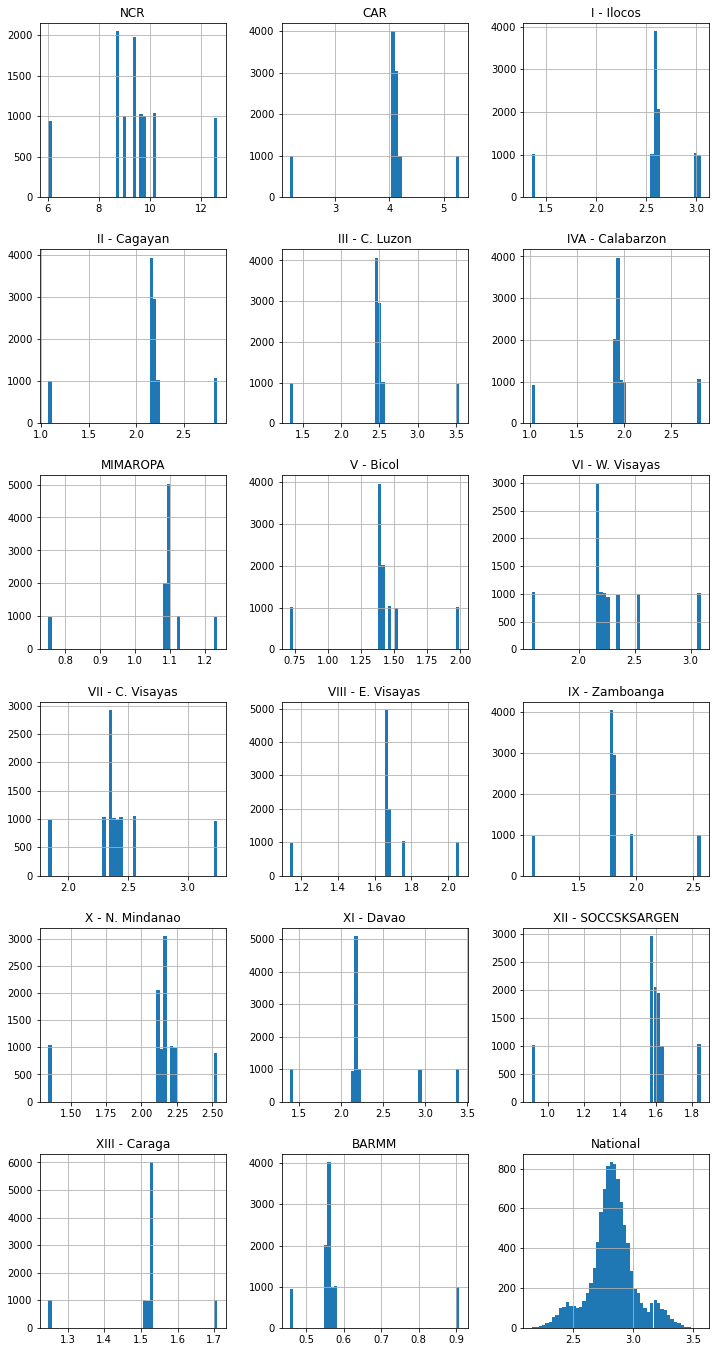

In [25]:
(df_boot_future_pd[df_boot_future_pd.Year == 2030]
 .drop(columns="Year")
 .set_index("Region").T
 .hist(bins=50, layout=(6,3), figsize=(12, 24))
);

### Create 95% prediction intervals

In [26]:
df_summary = df_boot_future_pd.iloc[:, :2]
df_summary["Mean"] = df_boot_future_pd.iloc[:, 2:].mean(axis=1)
df_summary["St Dev"] = df_boot_future_pd.iloc[:, 2:].std(axis=1)
df_summary["95% PI_LB"] = df_summary["Mean"] - 1.96 * df_summary["St Dev"]
df_summary["95% PI_UB"] = df_summary["Mean"] + 1.96 * df_summary["St Dev"]
df_summary["95% PI"] = list(zip(df_summary["95% PI_LB"].round(1),
                                df_summary["95% PI_UB"].round(1)))

df_summary = df_summary[df_summary.Year >= 2022]
df_summary = df_summary[["Year", "Region", "95% PI"]].reset_index(drop=True)

display(df_summary)

,Year,Region,95% PI
0,2022,NCR,"(5.0, 10.9)"
1,2023,NCR,"(5.2, 11.1)"
2,2024,NCR,"(5.4, 11.2)"
3,2025,NCR,"(5.6, 11.4)"
4,2026,NCR,"(5.8, 11.6)"
...,...,...,...
157,2026,National,"(2.3, 3.1)"
158,2027,National,"(2.3, 3.1)"
159,2028,National,"(2.4, 3.2)"
160,2029,National,"(2.4, 3.2)"


In [27]:
# df_summary.to_csv("~/cpt5/capstone/data/processed/supply PI v2.csv")